In [30]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Real_Estate.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


### Data Preprocessing

In [5]:
import datetime

In [6]:
# convert "Transaction date" to datetime and extract year and month
df['Transaction date'] = pd.to_datetime(df['Transaction date'])

In [7]:
df['Transaction year'] = df['Transaction date'].dt.year
df['Transaction month'] = df['Transaction date'].dt.month

In [8]:
# drop the original "Transaction date" as we've extracted relevant features
df = df.drop(columns=['Transaction date'])

In [9]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction year,Transaction month
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012,9
1,35.5,274.0144,2,25.012148,121.546990,24.970725,2012,9
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012,9
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012,9
4,8.5,967.4000,6,25.011037,121.479946,21.654710,2012,9


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# define features and target variable
X = df.drop('House price of unit area', axis=1)
y = df['House price of unit area']

In [12]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(331, 7)

In [17]:
X_test_scaled.shape

(83, 7)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [20]:
# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

In [21]:
results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

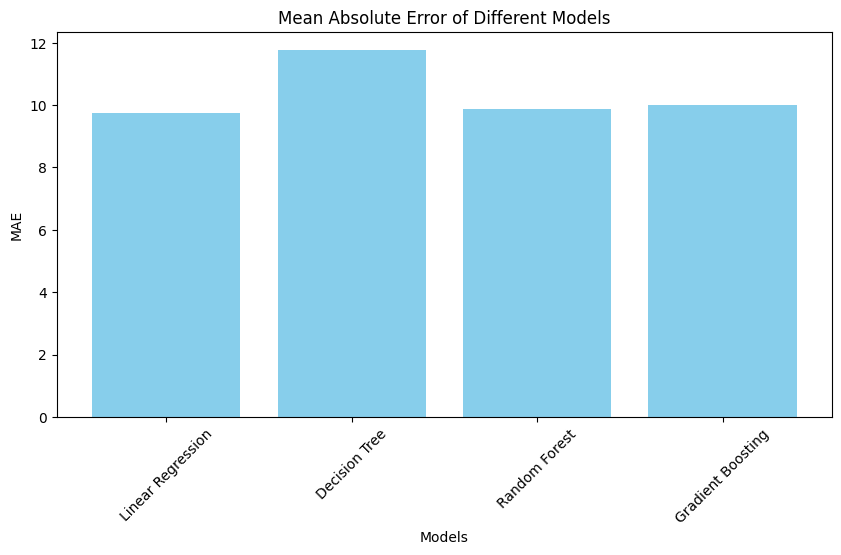

In [24]:
# Plotting MAE
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['MAE'], color='skyblue')
plt.title('Mean Absolute Error of Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

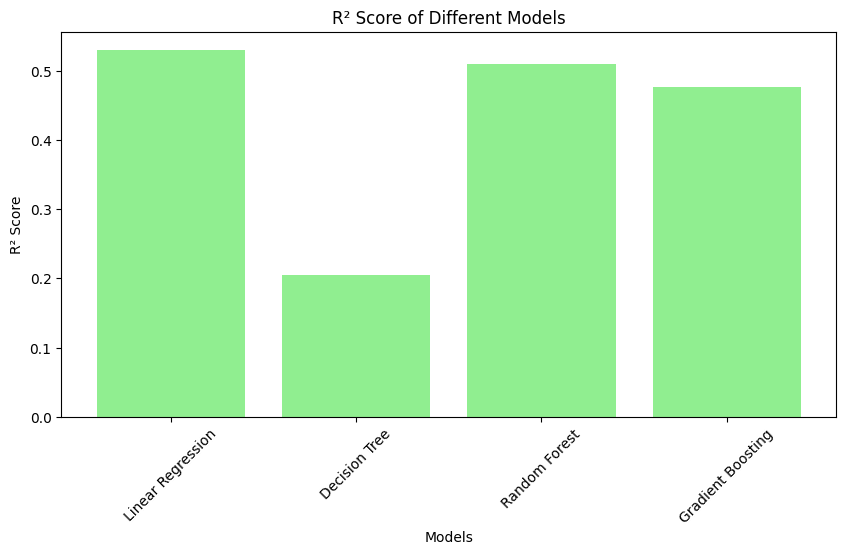

In [25]:
# Plotting R² Score
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df['R²'], color='lightgreen')
plt.title('R² Score of Different Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

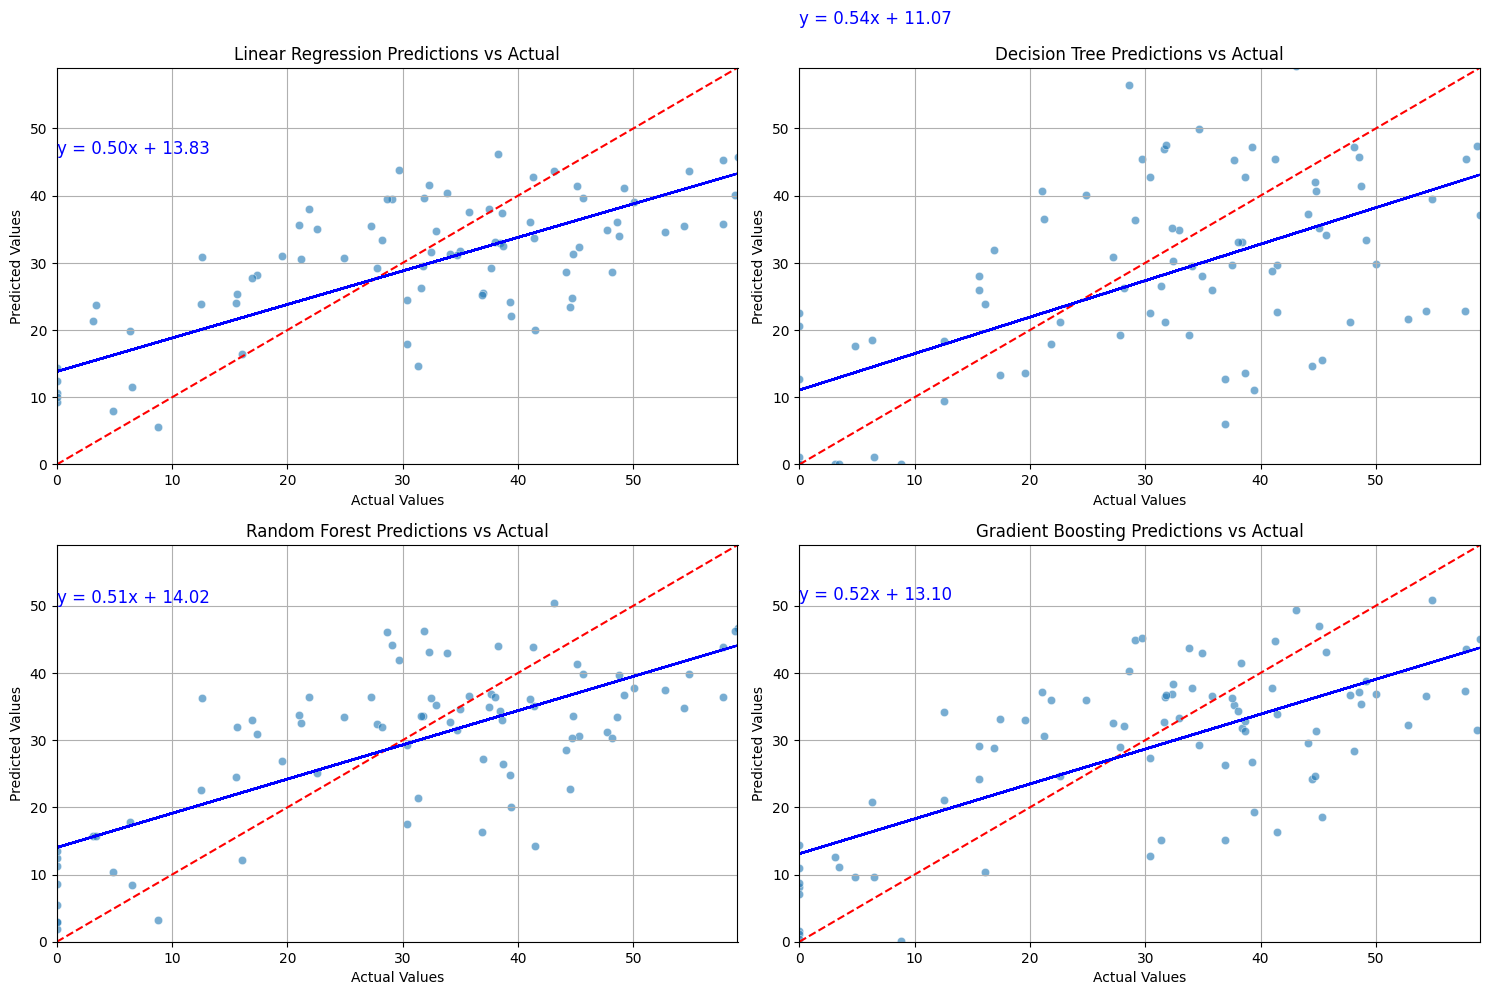

In [31]:
plt.figure(figsize=(15, 10))

# Iterate through each model and plot
for i, (name, model) in enumerate(models.items()):
    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Calculate the slope and intercept for the regression line
    slope, intercept = np.polyfit(y_test, predictions, 1)

    # Create a subplot for each model
    plt.subplot(2, 2, i + 1)  # Adjust grid size as needed
    sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
    sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Line for perfect predictions
    
    # Regression line
    plt.plot(y_test, slope * y_test + intercept, color='blue', linestyle='-')

    # Annotate the regression equation
    plt.text(min(y_test), max(predictions), f'y = {slope:.2f}x + {intercept:.2f}', 
             color='blue', fontsize=12)

    plt.title(f'{name} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.xlim(min(y_test), max(y_test))
    plt.ylim(min(y_test), max(y_test))
    plt.grid()

plt.tight_layout()
plt.show()

##### Red Line: This dashed line represents perfect predictions. It shows where the predicted values equal the actual values (i.e., if a model predicts perfectly, all points would fall on this line). It serves as a reference to evaluate how close the model's predictions are to the actual outcomes.

##### Blue Line: This solid line is the best-fit line (regression line) based on the model's predictions. It represents the linear relationship between the actual values and the predicted values. The equation displayed shows the slope and intercept of this line, helping to visualize how well the model's predictions align with the actual values.

#### Linear Regression has the lowest MAE (9.75) and the highest R² (0.53), making it the best-performing model among those evaluated. It suggests that, despite its simplicity, Linear Regression is quite effective for this dataset.